In [1]:
import numpy as np
import pandas as pd 

import gc
import chardet
import re

import seaborn as sns
import matplotlib.pyplot as plt



train_file = pd.read_csv("tamil_sentiment_full_train.tsv",sep="\t")
test_file = pd.read_csv("tamil_sentiment_full_dev.tsv",sep="\t")

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="blue" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
print(train_file[(train_file.category == 'Positive ')].index)

Int64Index([32852], dtype='int64')


In [6]:
train_file["category"][32852] = "Positive"

In [7]:
df_train_reviews = pd.DataFrame(train_file.text)
df_test_reviews = pd.DataFrame(test_file.text)
df_train_score = pd.DataFrame(train_file.category)
df_test_score = pd.DataFrame(test_file.category)


In [8]:
print(df_train_reviews.shape,df_test_reviews.shape)

(35656, 1) (3962, 1)


In [9]:
import re, string
regex = re.compile('[%s]' % re.escape(string.punctuation))
import demoji



def preprocessing(document):
        document = str(document)
        document = demoji.replace_with_desc(document).replace(":"," ").replace("-"," ")
        document = regex.sub('', document)
        document = re.sub(r'[0-9]', '', document)

        # remove all single characters
#         document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
#         document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)


        # Converting to Lowercase
        document = document.lower()
        
#         document = re.sub(r'(.+?)\1+', r'\1', document)

        tokens = document.split()

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text
    


In [10]:
corpus_train = df_train_reviews.text.apply(preprocessing)
corpus_test = df_test_reviews.text.apply(preprocessing)

In [11]:
corpus_test 

0        songsuperbkamallllla im waiting for dis song you
1       கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய ...
2       thalavia neenga veera level boss and neega tha...
3                    oru padam patha fellvera level music
4       hairstyle than mattama iruku adhu mattum mathi...
                              ...                        
3957    நாடக காதல் மிகப்பெரிய தவறு இதை தான் இந்த படம் ...
3958                            so long to see you suriya
3959    super sk ettan adipoli makkalle dec waiting fo...
3960          minimum m viewa vara veppoma all thala fans
3961                           vera vera level da version
Name: text, Length: 3962, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
#cv = TfidfVectorizer(ngram_range=(1,2))
cv = TfidfVectorizer(max_features=1500)
X_train = cv.fit_transform(corpus_train).toarray()
X_test = cv.transform(corpus_test).toarray()
X_train.shape

(35656, 1500)

In [13]:
type(df_test_score)

pandas.core.frame.DataFrame

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## LOGISTIC REGRESSION


In [15]:
#training - Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs',verbose=3,max_iter=250,penalty='l2',C=1,n_jobs=4)
classifier.fit(X_train , df_train_score)

c:\users\mailt\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:  1.0min finished


LogisticRegression(C=1, max_iter=250, multi_class='multinomial', n_jobs=4,
                   verbose=3)

In [16]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_test_score , y_pred)
accuracy

0.6219081272084805

In [17]:
print(classification_report(df_test_score,y_pred))

                precision    recall  f1-score   support

Mixed_feelings       0.33      0.10      0.16       438
      Negative       0.47      0.28      0.35       480
      Positive       0.67      0.89      0.77      2257
     not-Tamil       0.69      0.40      0.51       176
 unknown_state       0.45      0.33      0.38       611

      accuracy                           0.62      3962
     macro avg       0.52      0.40      0.43      3962
  weighted avg       0.58      0.62      0.58      3962



Normalized confusion matrix
[[0.10273973 0.11643836 0.64840183 0.01141553 0.12100457]
 [0.04791667 0.27708333 0.58333333 0.01041667 0.08125   ]
 [0.0194949  0.02436863 0.89277802 0.00531679 0.05804165]
 [0.         0.02272727 0.46022727 0.39772727 0.11931818]
 [0.04091653 0.06546645 0.54991817 0.01472995 0.3289689 ]]


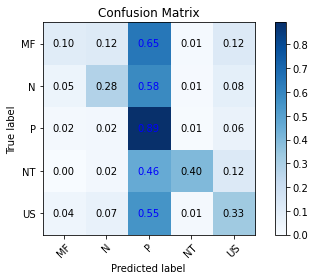

In [18]:
cnf_matrix_lr=confusion_matrix(df_test_score,y_pred)
# print(cnf_matrix_lr)
plot_confusion_matrix(cnf_matrix_lr,["MF","N","P","NT","US"],normalize=True,title="Confusion Matrix")